In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [6]:
df = pd.read_csv(r"C:\Users\patel\streamlit-coin-toss\vehicle-sales\vehicles_us.csv")
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

**Initial Data Overview**

In [9]:
df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

**Data Cleaning**

In [11]:
# Example cleaning: drop rows with missing price
df = df[df['price'].notna()]
df = df[df['odometer'].notna()]

# Fill or remove missing 'model_year' if needed
df = df[df['model_year'].notna()]
df['model_year'] = df['model_year'].astype(int)

# Create manufacturer column for later analysis
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])


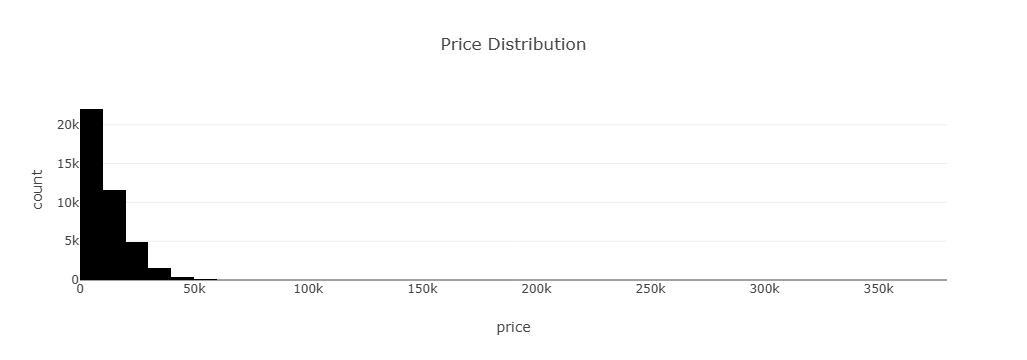

In [12]:
#Price distribution

px.histogram(df, x='price', nbins=50, title='Price Distribution')

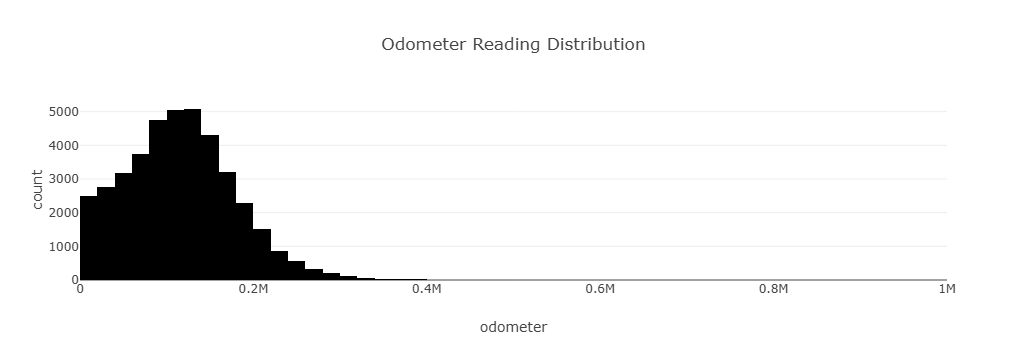

In [13]:
#Odometer reading

px.histogram(df, x='odometer', nbins=50, title='Odometer Reading Distribution')

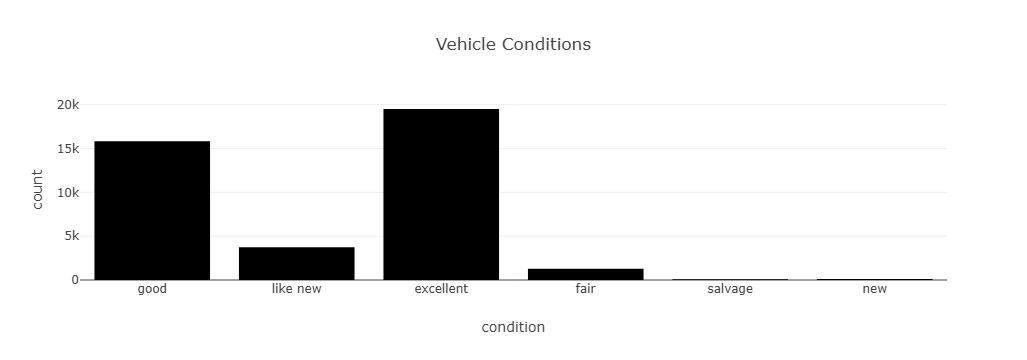

In [14]:
#Car conditions

px.histogram(df, x='condition', title='Vehicle Conditions')

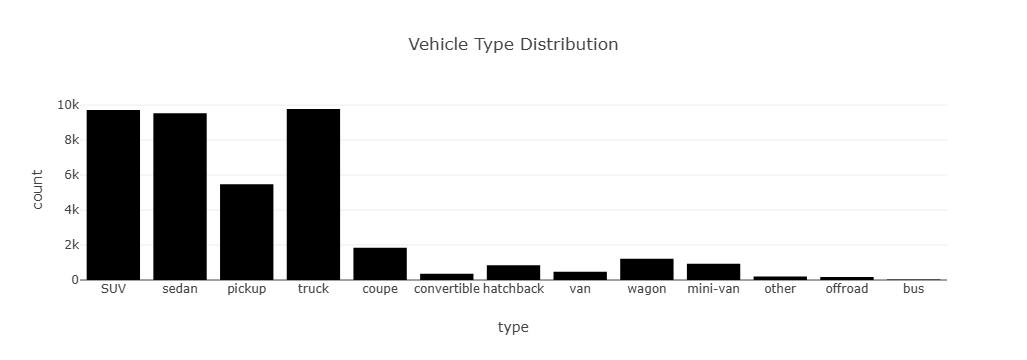

In [15]:
#Vehicle types

px.histogram(df, x='type', title='Vehicle Type Distribution')

**Bivariate Analysis: Scatter Plots**

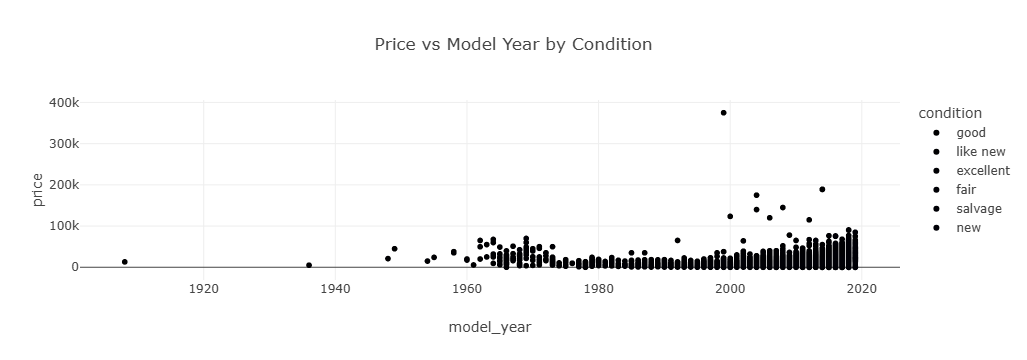

In [16]:
#Price vs Model Year

px.scatter(df, x='model_year', y='price', color='condition',
           title='Price vs Model Year by Condition')

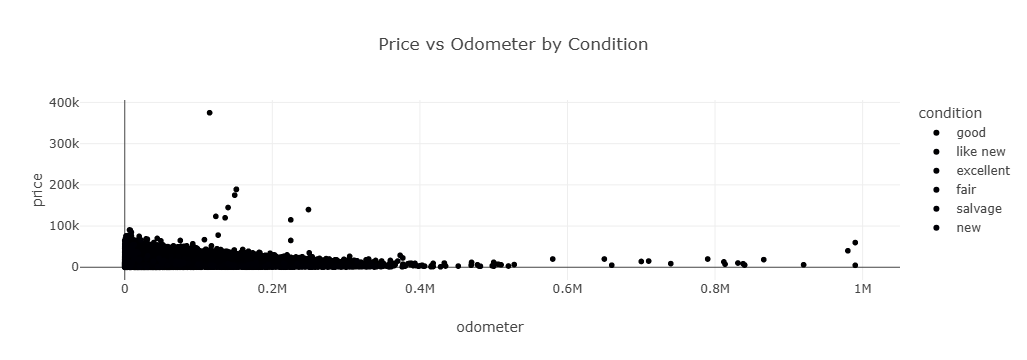

In [17]:
#Price vs Odometer

px.scatter(df, x='odometer', y='price', color='condition',
           title='Price vs Odometer by Condition')

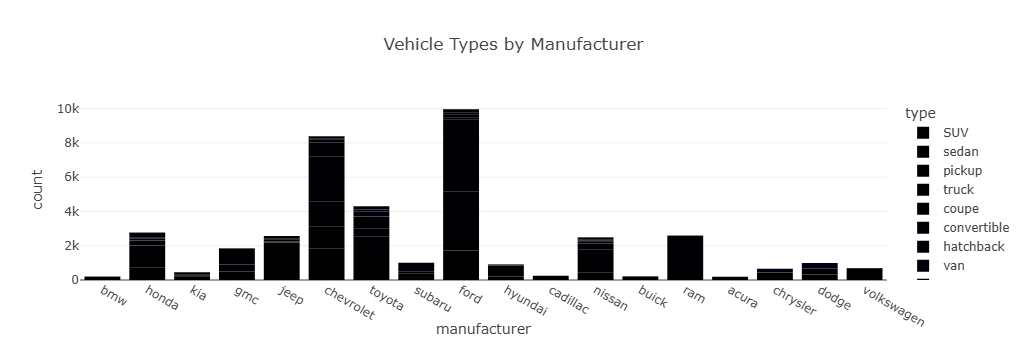

In [18]:
#Category Comparison: Histogram by Manufacturer

px.histogram(df, x='manufacturer', color='type',
             title='Vehicle Types by Manufacturer')